# Lab 04. Text Classification


This lab is devoted to text classification tasks.
- **Part 1 [8 points]** is about very common NLP problem - sentiment analysis.
- **Part 2 [7 points]** include tasks on POS tagging and WordEmbeddings.


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit

- Name your file according to this convention: `lab04_GroupNo_Surname_Name.ipynb`. If you don't have group number, put `nan` instead.
- Attach it to an **email** with **topic** `lab04_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-11-24 23:00:00 +03:00`

## Part 1. Bag of Words vs. Bag of Popcorn [8 points]

This task is based on [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. The goal is to label film reviews as positive or negative. 

Reviews may look like this:

```
I dont know why people think this is such a bad movie. Its got a pretty good plot, some good action, and the change of location for Harry does not hurt either. Sure some of its offensive and gratuitous but this is not the only movie like that. Eastwood is in good form as Dirty Harry, and I liked Pat Hingle in this movie as the small town cop. If you liked DIRTY HARRY, then you should see this one, its a lot better than THE DEAD POOL. 4/5
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
reviews = pd.read_csv("reviews.tsv", sep="\t")
reviews.head(3)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...


In [3]:
X = reviews["review"]
y = reviews["sentiment"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=42, stratify=y)

### Time to extract features

In this part of the assignment we will apply several methods of feature extraction and comapre them.

**Task 1.1 [0.5 point] - Simple BOW** 

In this task we will build a simple bow representation - without any preprocessing. 

For this purpose we will use [*CountVectorizer*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) - a method that transforms text dataset into a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html).

Import CountVectorizer:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

Now try each of these approaches:
- fit vectorizer on X_train, apply to X_train, X_test
- fit vectorizer on X_train, apply to X_train; fit on X_test, apply to X_test
- fit vectorizer on X, apply to X_train, X_test

Report output matrix sizes in each case. 
- What is the difference? 
- Which of these approaches is the most fair and correct?

Use the most fair and correct one to get `X_train_0` and `X_test_0` - they will be needed for further tasks.

In [7]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 68482)


In [8]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)
count_vectorizer.fit(X_test)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 38591)


In [9]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 74849) (5000, 74849)


The main difference between them is the number of features (words). So the most fair and correct approach is the firdt as we count each word in train dataset and know nothing about test dataset

In [10]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 68482)


In [11]:
print(type(X_train_0), type(X_test_0))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>


**Task 1.2 [0.5 point] - S___se matrices**

What is the data type of `X_train_0` and `X_test_0`? What are those?

What differs them from usual np.arrays? Name several types how those special matrices are stored and what they are good for.

*Answer:*
- The data type of `X_train_0` and `X_test_0` is *sparse matrix*;  
- As it has a lot of null elements, there are some different type of sparse matrices which help more rationally to store the data.  
There are  
Compressed Sparse Column format and Compressed Sparse Row format to work with the number of non-null values ​​in each row or column;  
COOrdinate format helps to quickly get the coordinates of any non-null element;  
Dictionary of Keys helps with a set of coordinates (keys) to quickly go through all non-null values.

**Task 1.3 [1 points] - Training**

Train LogisticRegression and Random forest on this data representations.
- Compare training time 
- Compare Accuracy, precision, recall 
- Plot ROC Curve and calculate ROC AUC (don't forget to predict_proba) 
- Plot Precision-Recall curve and calculate f1-score (for example, with `plt.subplots(nrows=1, ncols=2)`)
- Print the trickiest missclassified objects. Why they were hard to classify? 


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time as tm

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score, auc

In [14]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1)
lr_model = LogisticRegression(max_iter=1e5, n_jobs=-1)

In [15]:
start_1 = tm.time()
lr_model.fit(X_train_0, y_train)
end_1 = tm.time()
print("LR time is", round(end_1 - start_1, 5))

LR time is 15.30198


In [16]:
start_2 = tm.time()
rf_model.fit(X_train_0, y_train)
end_2 = tm.time()
print("RF time is", round(end_2 - start_2, 5))

RF time is 66.50741


There are large time difference!

In [17]:
clf_predictions = []
for clf in [lr_model, rf_model]:
    pred = clf.predict(X_test_0)
    clf_predictions.append(pred)

In [18]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions] 
macro_recalls = [recall_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions] 

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

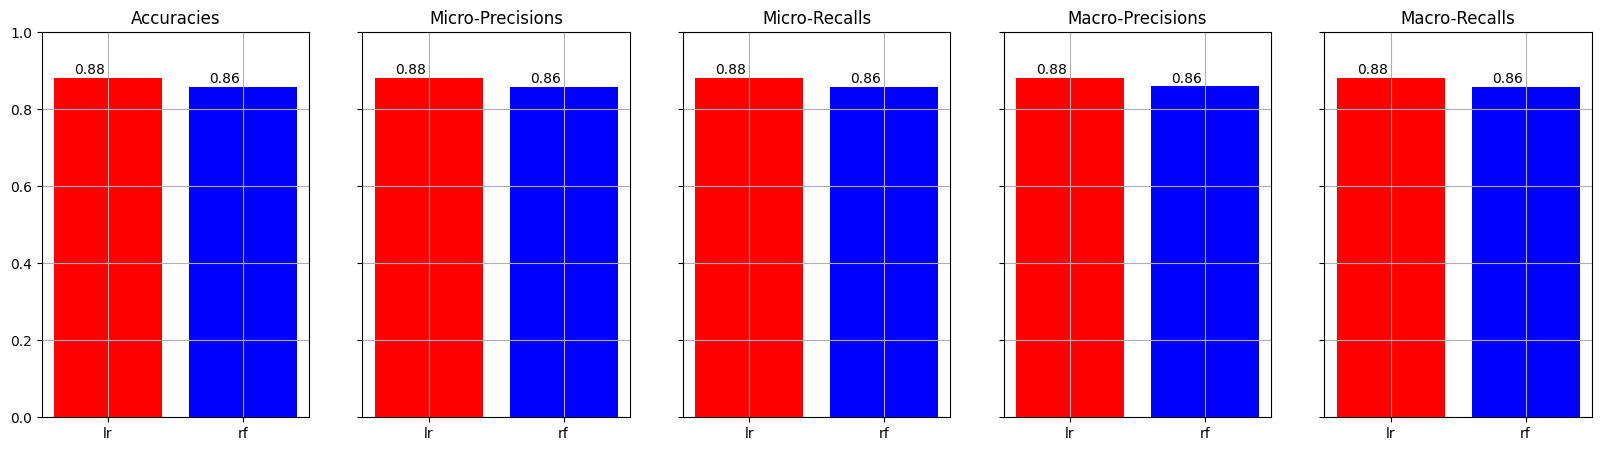

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["lr", "rf"]
colors = ["red", "blue"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

In [20]:
predict = []
predict_proba = []
for clf in [lr_model, rf_model]:
    pred = clf.predict(X_test_0)
    predict.append(pred)
    pred = clf.predict_proba(X_test_0)[:, 1]
    predict_proba.append(pred)

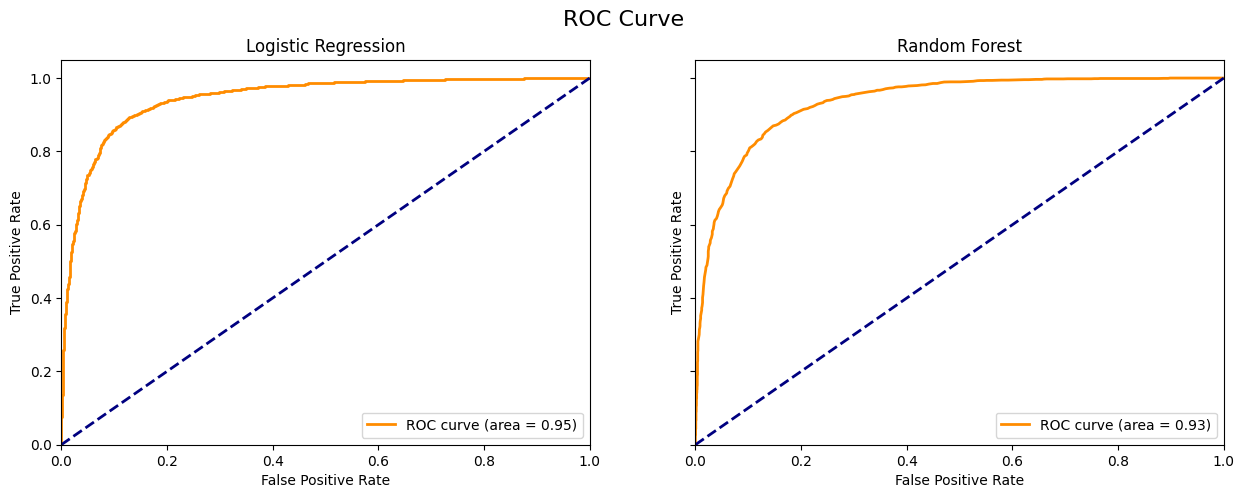

In [21]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ =  roc_curve(y_test, predict_proba[i])
    roc_auc[i] = roc_auc_score(y_test, predict_proba[i])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
fig.suptitle("ROC Curve", fontsize=16)
ax[0].plot(fpr[0], tpr[0], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[0])
ax[0].set_title("Logistic Regression")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].legend(loc="lower right")

ax[1].plot(fpr[1], tpr[1], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[1])
ax[1].set_title("Random Forest")
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].legend(loc="lower right")

plt.show()


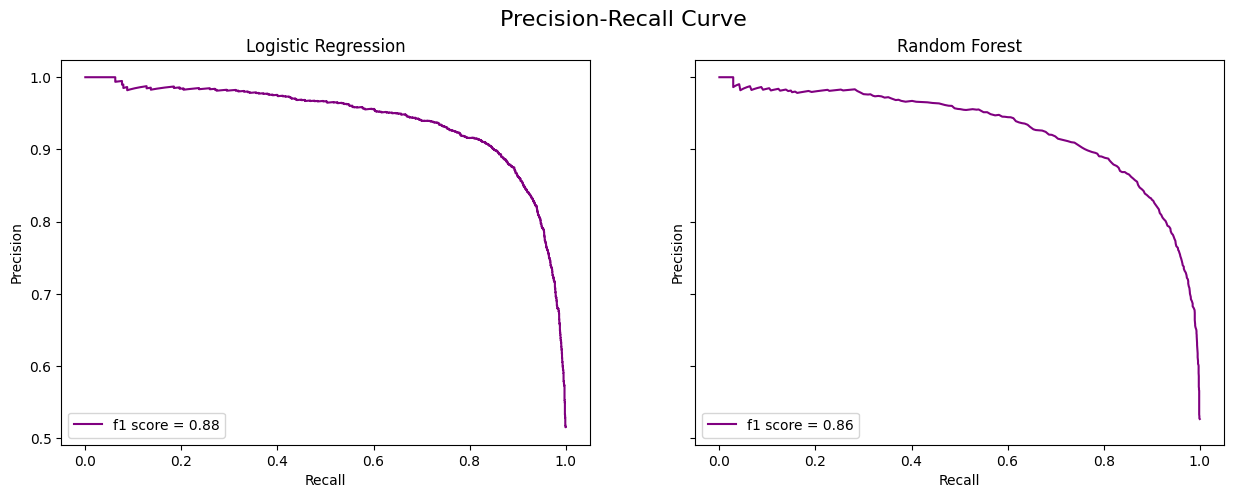

In [22]:
precision = dict()
recall = dict()
thresholds = dict()
f1_s = dict()
for i in range(2):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test, predict_proba[i])
    f1_s[i] = f1_score(y_test, predict[i])
    

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
fig.suptitle("Precision-Recall Curve", fontsize=16)
ax[0].plot(recall[0], precision[0], color='purple', label="f1 score = %0.2f" % f1_s[0])
ax[0].set_title("Logistic Regression")
ax[0].set_ylabel('Precision')
ax[0].set_xlabel('Recall')
ax[0].legend(loc="lower left")

ax[1].plot(recall[1], precision[1], color='purple', label="f1 score = %0.2f" % f1_s[1])
ax[1].set_title("Random Forest")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
ax[1].legend(loc="lower left")

plt.show()    

In [148]:
lr_missclass = []
for a, b, c, d in zip(predict[0], y_test, X_test, predict_proba[0]):
    if a != b:
        lr_missclass.append([a, b, c, d])

predict_proba_mis_rf = []
rf_missclass = []
for a, b, c, d in zip(predict[1], y_test, X_test, predict_proba[1]):
    if a != b:
        rf_missclass.append([a, b, c, d])

Misclassified negative

In [163]:
df_lr_missclass = pd.DataFrame(lr_missclass, columns=["predict", "real", "review", "predict proba"])
df_lr_missclass = df_lr_missclass.sort_values(by="predict proba", ascending=False)
print(df_lr_missclass.head(1))

     predict  real                                             review  \
581        1     0  If you hit your teens in the 70s, as I did, yo...   

     predict proba  
581       0.999999  


In [164]:
print(lr_missclass[581])

[1, 0, "If you hit your teens in the 70s, as I did, you probably remember the stories about Studio 54 whether or not you liked disco. An exclusive club, it was the perfect symbol of 70s cultural overindulgence and self-absorption; there's even an excellent VH1 documentary about the club that could tell you everything you wanted to know about its heyday, and the stories are easily interesting enough to spawn a very captivating film.<br /><br />Sadly, this isn't it. 54 follows the lives of a few of its employees, a bartender named Shane (Ryan Phillippe), a busboy named Greg (Breckin Meyer), his wife, a coat-check girl, Anita (Selma Hayek), and of course the master of ceremonies himself, Steve Rubell (Mike Meyers). While the goings-on at the club are well represented, this film concerns itself more with the personal lives of the workers, following Shane's story the closest.<br /><br />The movie works in spurts. Sometimes it captures perfectly the shallowness of the nightlife culture (such

In [165]:
df_rf_missclass = pd.DataFrame(rf_missclass, columns=["predict", "real", "review", "predict proba"])
df_rf_missclass = df_rf_missclass.sort_values(by="predict proba", ascending=False)
print(df_rf_missclass.head(1))

     predict  real                                             review  \
397        1     0  One of Frances Farmer's earliest movies; at 22...   

     predict proba  
397          0.832  


In [166]:
print(rf_missclass[397])

[1, 0, "One of Frances Farmer's earliest movies; at 22, she is absolutely beautiful. Bing Crosby is in great voice, but the songs are not his best. Martha Raye and Bob Burns are interesting, but their comedy, probably great in its time, is really corny today. Roy Rogers also appears- in a singing role. In my view only worth watching if you are a Frances Farmer fan, and possibly a Bing Crosby fan.", 0.832]


Consider two misclassified objects, one from each model, with the highest probability. I think it's hard to classificate them because the text has a rather mixed opinion: there are some negative words about this film and a lot of positive words when compared with other films or something else.

Misclassified positive

In [167]:
df_lr_missclass = pd.DataFrame(lr_missclass, columns=["predict", "real", "review", "predict proba"])
df_lr_missclass = df_lr_missclass.sort_values(by="predict proba", ascending=True)
print(df_lr_missclass.head(1))

     predict  real                                             review  \
237        0     1  Like the gentle giants that make up the latter...   

     predict proba  
237   1.524841e-07  


In [168]:
print(lr_missclass[237])

[0, 1, 'Like the gentle giants that make up the latter half of this film\'s title, Michael Oblowitz\'s latest production has grace, but it\'s also slow and ponderous. The producer\'s last outing, \\Mosquitoman-3D\\" had the same problem. It\'s hard to imagine a boring shark movie, but they somehow managed it. The only draw for Hammerhead: Shark Frenzy was it\'s passable animatronix, which is always fun when dealing with wondrous worlds beneath the ocean\'s surface. But even that was only passable. Poor focus in some scenes made the production seems amateurish. With Dolphins and Whales, the technology is all but wasted. Cloudy scenes and too many close-ups of the film\'s giant subjects do nothing to take advantage of IMAX\'s stunning 3D capabilities. There are far too few scenes of any depth or variety. Close-ups of these awesome creatures just look flat and there is often only one creature in the cameras field, so there is no contrast of depth. Michael Oblowitz is trying to follow in h

In [169]:
df_rf_missclass = pd.DataFrame(rf_missclass, columns=["predict", "real", "review", "predict proba"])
df_rf_missclass = df_rf_missclass.sort_values(by="predict proba", ascending=True)
print(df_rf_missclass.head(1))

    predict  real                                             review  \
99        0     1  I wouldn't go so far as to not recommend this ...   

    predict proba  
99          0.232  


In [170]:
print(rf_missclass[99])

[0, 1, "I wouldn't go so far as to not recommend this movie, since the only problems I have with it are due to an overexposure to the plot devices used in the movie - the sort of things common to every kids movie ever made it seems. That doesn't make it bad, just not something I'd go far.<br /><br />It is a little saccharine, so I might say that for the most part anyone looking for something with a little more wit could be disappointed in an obviously for-kids movie like this.<br /><br />However, all of that goes out the window when that squirrel (the one in all the trailers) comes on-screen. His time is limited, but it seems apparent that the decision makers had the wisdom to tell these guys 'hey, could you stick in a little more squirrel?' every time it's getting intolerably dull. That doesn't save the movie, but you can leave saying 'at least there was one aspect where I couldn't stop laughing.'<br /><br />And of course, visually it won't disappoint, but that's almost a given with P

It also uses a lot of complex constructions with negative words, but the general idea is positive.

In [26]:
print("Random Forest train data accuracy", accuracy_score(y_train, rf_model.predict(X_train_0)))

Random Forest train data accuracy 1.0


Which model gives higher scores? Any ideas why? Please suggest 1-2 reasons.

*Answer:*
The score is higher in the `Logistic Regression`. I think this is due to the fact that the Random Forest tends to overfit. As we can see on the train data, the forest gives an excellent score.

### More sophisticated feature prerocessing

As we have seen, simple BOW can give us some result - it's time to improve it.

**Task 1.4 [1 point] - Frequencies calculation**

- Calculate top-20 words in train set and test set. *Are they meaningful?*
- Import `stopwords` and print some of them. What are those?
- Recalculate top-20 words in each set, but exclude stop words.
- Does now top-20 include more useful words?

In [27]:
from collections import Counter
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

In [28]:
print(count_vectorizer.get_feature_names_out())

['00' '000' '0000000000001' ... 'østbye' 'über' 'üvegtigris']


In [29]:
counts_train = pd.DataFrame(X_train_0.toarray(), columns=count_vectorizer.get_feature_names_out())

In [30]:
counts_train_sum = counts_train.sum()

In [31]:
counts_train_sum.sort_values(ascending=False).head(20)

the      269967
and      131776
of       116943
to       108751
is        86164
br        81649
it        77403
in        75100
this      61066
that      58846
was       38660
as        37446
for       35511
movie     35508
with      35478
but       34063
film      32347
on        27555
you       27493
not       24519
dtype: int64

In [32]:
counts_test = pd.DataFrame(X_test_0.toarray(), columns=count_vectorizer.get_feature_names_out())

In [33]:
counts_test_sum = counts_test.sum()

In [34]:
counts_test_sum.sort_values(ascending=False).head(20)

the      66782
and      32364
of       28921
to       26973
is       21168
br       20222
it       19064
in       18876
this     14941
that     14440
was       9549
as        9489
for       8834
with      8652
but       8560
movie     8539
film      7812
you       6774
on        6647
not       6113
dtype: int64

As we can see, the top 20 words are the same for the train and test data and not meaningful. Most of them are auxiliary parts of speech.

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timo2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stops = set(stopwords.words('english'))
print(stops)

{'about', 'then', 'them', 'than', "you'd", 'here', 'before', "you've", 'we', 'own', 'those', 'weren', 'what', 'just', 'this', 'her', 'ain', 'both', 'too', 'hasn', "shan't", 'further', 'into', 'up', 'now', 'during', 'i', "you're", 'not', 'or', 're', 'you', 'after', 'ours', 'any', 'if', 'she', 'below', "haven't", "doesn't", 'is', 'itself', 'because', 'did', 'off', 'when', 'few', 'same', 't', "weren't", 'above', 'ma', 'm', 'does', 'won', 'himself', "she's", 'all', 'on', 'can', 'him', 'where', 'for', 'which', 'until', 've', 'why', 'his', 'your', 'such', 'while', 'are', 'wouldn', 'whom', 'from', 'our', "won't", 'a', 'once', 'yours', "don't", 'again', 'haven', 'by', 'most', 'isn', "isn't", 'themselves', 'who', 'o', 'have', 'yourselves', 's', "aren't", 'shan', 'couldn', 'me', "it's", 'some', 'has', 'doesn', 'their', 'an', 'they', "didn't", "that'll", 'through', 'doing', 'wasn', 'having', 'how', 'but', 'under', "you'll", 'hers', 'as', "wouldn't", 'it', 'and', 'in', 'between', 'to', 'no', 'will

Stop words are an auxiliary parts of speech which we can find a lot in every text but they are not meaningful.

Let`s remove stop words

In [37]:
filtered_features = [w for w in count_vectorizer.get_feature_names_out() if not w.lower() in stops]

In [38]:
counts_train_f = counts_train[filtered_features]

In [39]:
counts_train_sum_f = counts_train_f.sum()

In [40]:
counts_train_sum_f.sort_values(ascending=False).head(20)

br        81649
movie     35508
film      32347
one       21616
like      16287
good      12015
even      10200
time      10146
would      9927
story      9599
really     9437
see        9267
well       8550
much       7876
people     7501
bad        7442
get        7393
also       7362
great      7262
first      7254
dtype: int64

In [41]:
counts_test_f = counts_test[filtered_features]

In [42]:
counts_test_sum_f = counts_test_f.sum()

In [43]:
counts_test_sum_f.sort_values(ascending=False).head(20)

br        20222
movie      8539
film       7812
one        5179
like       3994
good       3132
time       2581
would      2509
even       2455
story      2389
really     2301
see        2212
well       2117
get        1918
much       1888
bad        1866
first      1810
great      1798
also       1797
people     1786
dtype: int64

**There are more words describing the film now**

**Task 1.5 [1 point] - Word Freqs by class**

How do you think, will top100 tokens for positive and negative classes be different? Use data to prove your point.

*Answer:*
I think *Yes*, at least for negative reviews there should be more negative words, and for positive - positive.

Let's see how it really is. We will use *filtered* features next.

In [44]:
tokens = []
tk = WhitespaceTokenizer()
for x in X_train:
    tokens.append(tk.tokenize(x.lower()))

In [45]:
tokens = [t for token in tokens for t in token if t not in stops]
c = Counter(tokens)

In [46]:
print(dict(c.most_common(20)))

{'/><br': 40824, 'movie': 24926, 'film': 22347, 'one': 18119, 'like': 15066, 'even': 9693, 'would': 9602, 'good': 9434, 'really': 8895, 'see': 8390, '-': 7494, 'get': 7115, 'much': 7077, 'story': 7014, 'also': 6448, 'first': 6400, 'time': 6379, 'people': 6215, 'great': 6151, 'make': 6066}


In [47]:
pos_tokens = []
neg_tokens = []
for x, y in zip(X_train, y_train):
    if y == 1:
        pos_tokens.append(tk.tokenize(x.lower()))
    else:
        neg_tokens.append(tk.tokenize(x.lower()))

In [48]:
pos_tokens = [t for token in pos_tokens for t in token if t not in stops]
neg_tokens = [t for token in neg_tokens for t in token if t not in stops]
c1 = Counter(pos_tokens)
c2 = Counter(neg_tokens)

In [49]:
print("Positive", dict(c1.most_common(100)), "Negative", dict(c2.most_common(100)), sep='\n')

Positive
{'/><br': 19777, 'film': 11790, 'movie': 10956, 'one': 9412, 'like': 6728, 'good': 4787, 'great': 4407, 'see': 4345, 'really': 4207, 'would': 4203, 'story': 4058, 'also': 4004, '-': 3809, 'even': 3761, 'much': 3445, 'first': 3338, 'get': 3294, 'time': 3202, 'well': 3091, 'best': 2991, '/>the': 2969, 'people': 2944, 'many': 2900, 'love': 2866, 'two': 2734, 'think': 2721, 'made': 2590, 'never': 2563, 'little': 2561, 'make': 2527, 'could': 2475, 'still': 2395, 'way': 2331, 'seen': 2268, 'watch': 2210, 'films': 2184, '<br': 2174, 'characters': 2079, 'movies': 2078, 'character': 2075, 'it.': 2055, 'know': 2030, 'life': 1967, 'show': 1944, 'man': 1897, 'makes': 1893, 'ever': 1833, 'new': 1818, 'film,': 1785, 'film.': 1779, 'find': 1774, 'movie.': 1733, 'go': 1728, 'young': 1728, 'back': 1714, 'real': 1708, 'quite': 1623, 'years': 1599, 'better': 1580, 'scene': 1573, 'lot': 1564, 'may': 1559, 'say': 1554, 'every': 1543, 'something': 1539, 'always': 1538, 'us': 1516, 'old': 1486, 'act

In [50]:
pos_neg_count = 0
for val in dict(c1.most_common(100)).keys():
    if val in dict(c2.most_common(100)).keys():
        pos_neg_count = pos_neg_count + 1
print(pos_neg_count)

82


As we can see, most of the features are the same. And the most popular ones are slightly different in order.

**Task 1.6 [2 points] - Reducing dimensionality**

The goal is to reduce number of features to 15000.

Implement the following methods of dimensinality reduction:
1. Use CountVectorizer, but leave only 15k most frequent tokens
2. Use HashingVectorizer with 15k features
3. Use 15k most important features from perspective of previously trained RandomForest

*Hints:*
- in 1 and 2 you don't have to apply nltk.corpus.stopwords, vectorizers have `stopwords` parameter
- in 1 look for `vocabulary` parameter
- in 3... remember `lab02`? You may use `X_train_0` and `X_test_0` as input matrices

Train LogisticRegression and RandomForest on each dataset and compare ROC AUC scores of the classifiers.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

- **1**

In [52]:
tokens = []
tk = WhitespaceTokenizer()
for x in X_train:
    tokens.append(tk.tokenize(x.lower()))

In [53]:
tokens = [t for token in tokens for t in token if t not in stops]
c = Counter(tokens)

In [54]:
vocabulary = dict(c.most_common(15000)).keys()

In [55]:
count_vectorizer = CountVectorizer(stop_words="english", vocabulary=vocabulary)

In [56]:
count_vectorizer.fit(X_train)
X_train_01 = count_vectorizer.transform(X_train)
X_test_01 = count_vectorizer.transform(X_test)

print(X_train_01.shape, X_test_01.shape)

(20000, 15000) (5000, 15000)


In [57]:
rf_model_1 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
lr_model_1 = LogisticRegression(max_iter=1e5, n_jobs=-1)

In [58]:
start_1 = tm.time()
lr_model_1.fit(X_train_01, y_train)
end_1 = tm.time()
print("LR time is", round(end_1 - start_1, 5))

LR time is 3.10444


In [59]:
start_2 = tm.time()
rf_model_1.fit(X_train_01, y_train)
end_2 = tm.time()
print("RF time is", round(end_2 - start_2, 5))

RF time is 46.85768


It looks faster and it`s cool)

In [60]:
predict_1 = []
predict_proba_1 = []
for clf in [lr_model_1, rf_model_1]:
    pred = clf.predict(X_test_01)
    predict_1.append(pred)
    pred = clf.predict_proba(X_test_01)[:, 1]
    predict_proba_1.append(pred)

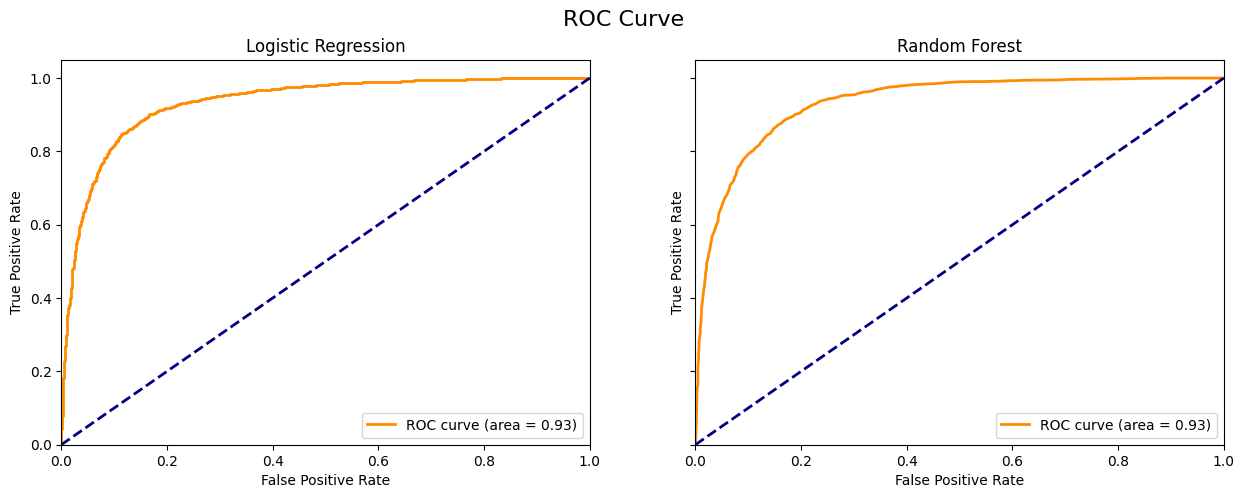

In [61]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ =  roc_curve(y_test, predict_proba_1[i])
    roc_auc[i] = roc_auc_score(y_test, predict_proba_1[i])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
fig.suptitle("ROC Curve", fontsize=16)
ax[0].plot(fpr[0], tpr[0], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[0])
ax[0].set_title("Logistic Regression")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].legend(loc="lower right")

ax[1].plot(fpr[1], tpr[1], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[1])
ax[1].set_title("Random Forest")
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].legend(loc="lower right")

plt.show()


This time scores are same and a little worse than all features model score.

- **2**

In [62]:
hashing_vectorizer = HashingVectorizer(stop_words="english", n_features=15000)

In [63]:
hashing_vectorizer.fit(X_train)
X_train_02 = hashing_vectorizer.transform(X_train)
X_test_02 = hashing_vectorizer.transform(X_test)

print(X_train_02.shape, X_test_02.shape)

(20000, 15000) (5000, 15000)


In [64]:
rf_model_2 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
lr_model_2 = LogisticRegression(max_iter=1e5, n_jobs=-1)

In [65]:
start_1 = tm.time()
lr_model_2.fit(X_train_02, y_train)
end_1 = tm.time()
print("LR time is", round(end_1 - start_1, 5))

LR time is 2.2462


In [66]:
start_2 = tm.time()
rf_model_2.fit(X_train_02, y_train)
end_2 = tm.time()
print("RF time is", round(end_2 - start_2, 5))

RF time is 39.63495


Wow, it`s faster again!

In [67]:
predict_2 = []
predict_proba_2 = []
for clf in [lr_model_2, rf_model_2]:
    pred = clf.predict(X_test_02)
    predict_2.append(pred)
    pred = clf.predict_proba(X_test_02)[:, 1]
    predict_proba_2.append(pred)

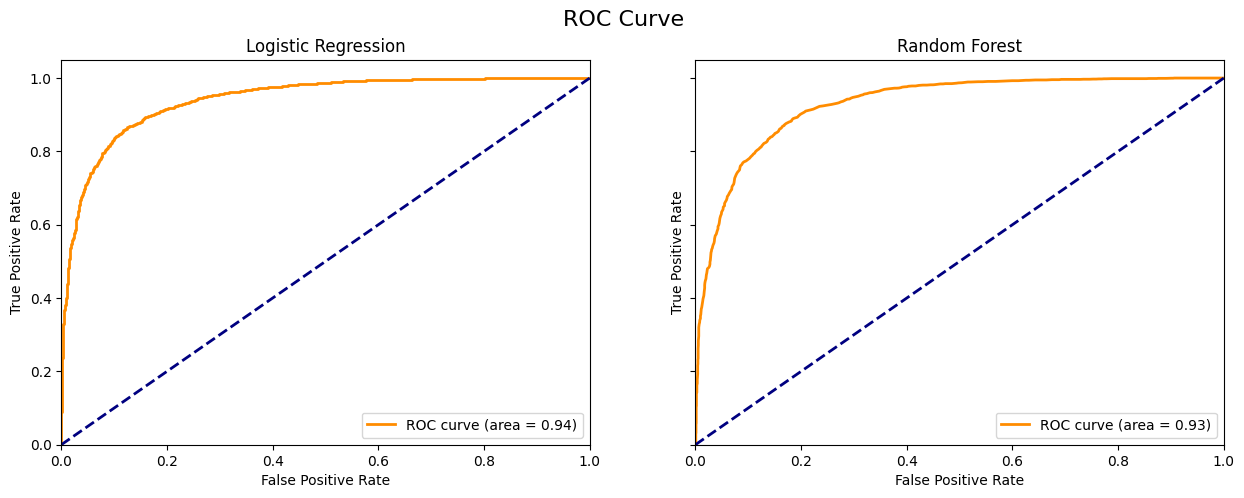

In [68]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ =  roc_curve(y_test, predict_proba_2[i])
    roc_auc[i] = roc_auc_score(y_test, predict_proba_2[i])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
fig.suptitle("ROC Curve", fontsize=16)
ax[0].plot(fpr[0], tpr[0], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[0])
ax[0].set_title("Logistic Regression")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].legend(loc="lower right")

ax[1].plot(fpr[1], tpr[1], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[1])
ax[1].set_title("Random Forest")
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].legend(loc="lower right")

plt.show()


In this pair of models we can see the same difference as at the first time and very close results to it.

- **3**

In [69]:
X_train_0.shape

(20000, 68482)

In [70]:
features_im = rf_model.feature_importances_
features = dict(zip(count_vectorizer.get_feature_names_out(), features_im))

In [71]:
features_sorted = sorted(features, key=features.get, reverse=True)

In [72]:
print(features_sorted[0:10])

['overrated', 'differences', 'tied', 'intensely', 'shouting', 'ambitious', 'dad', 'anime', '1980s,', 'fantasy.']


In [73]:
count_vectorizer = CountVectorizer(stop_words="english", vocabulary=features_sorted[0:15000])

In [74]:
count_vectorizer.fit(X_train)
X_train_03 = count_vectorizer.transform(X_train)
X_test_03 = count_vectorizer.transform(X_test)

print(X_train_03.shape, X_test_03.shape)

(20000, 15000) (5000, 15000)


In [75]:
rf_model_3 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
lr_model_3 = LogisticRegression(max_iter=1e5, n_jobs=-1)

In [76]:
start_1 = tm.time()
lr_model_3.fit(X_train_03, y_train)
end_1 = tm.time()
print("LR time is", round(end_1 - start_1, 5))

LR time is 2.49431


In [77]:
start_2 = tm.time()
rf_model_3.fit(X_train_03, y_train)
end_2 = tm.time()
print("RF time is", round(end_2 - start_2, 5))

RF time is 40.18095


In [78]:
predict_3 = []
predict_proba_3 = []
for clf in [lr_model_3, rf_model_3]:
    pred = clf.predict(X_test_03)
    predict_3.append(pred)
    pred = clf.predict_proba(X_test_03)[:, 1]
    predict_proba_3.append(pred)

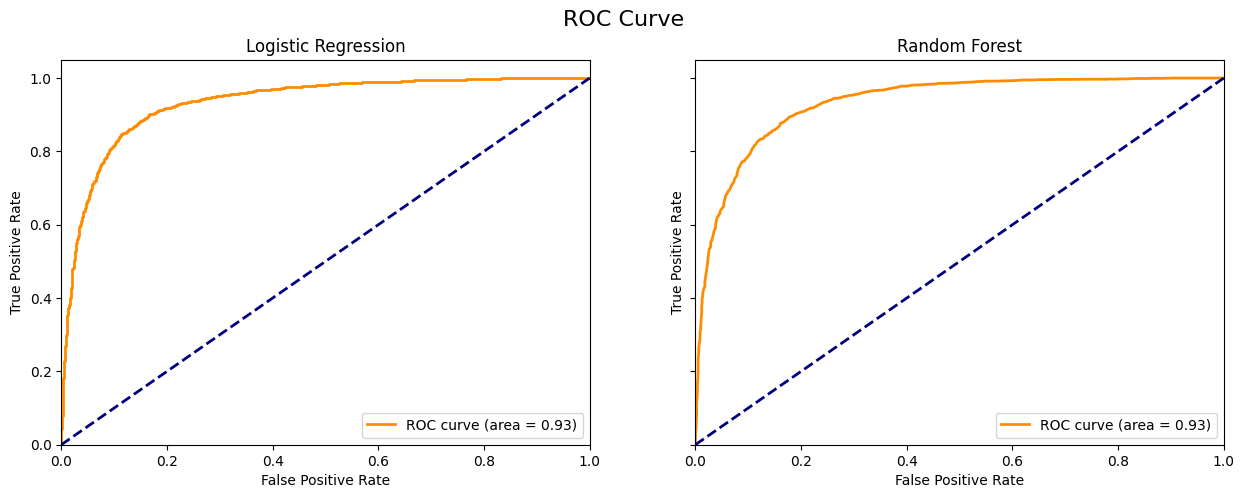

In [79]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ =  roc_curve(y_test, predict_proba_3[i])
    roc_auc[i] = roc_auc_score(y_test, predict_proba_3[i])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
fig.suptitle("ROC Curve", fontsize=16)
ax[0].plot(fpr[0], tpr[0], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[0])
ax[0].set_title("Logistic Regression")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].legend(loc="lower right")

ax[1].plot(fpr[1], tpr[1], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[1])
ax[1].set_title("Random Forest")
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].legend(loc="lower right")

plt.show()


The same results as for the second method but it work slower.

**Task 1.7 [2 points] - Token Normalization**

Choose the best working method from previous task. Try improve it by applying a token normalization technique.

You may use one of normalizers imported below, but feel free to experiment.

Do the following:
- Apply normalizer to X_train, X_test
- Build BOW with CountVectorizer + stopwords. What are the shapes of train and test matrices now?
- Reduce dimensionality with the best method from Task 2.6. You may try all of them
- Train LR/RF to examine whether ROC AUC or Accuracy was improved.

In [80]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [81]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\timo2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\timo2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [82]:
wnl = WordNetLemmatizer()

X_train_1 = [wnl.lemmatize(x) for x in X_train]
X_test_1 = [wnl.lemmatize(x) for x in X_test]

In [83]:
count_vectorizer = CountVectorizer(stop_words="english")

count_vectorizer.fit(X_train_1)
X_train_10 = count_vectorizer.transform(X_train_1)
X_test_10 = count_vectorizer.transform(X_test_1)

print(X_train_10.shape, X_test_10.shape)

(20000, 68172) (5000, 68172)


In [84]:
hashing_vectorizer = HashingVectorizer(stop_words="english", n_features=15000)

In [85]:
hashing_vectorizer.fit(X_train_1)
X_train_11 = hashing_vectorizer.transform(X_train_1)
X_test_11 = hashing_vectorizer.transform(X_test_1)

print(X_train_11.shape, X_test_11.shape)

(20000, 15000) (5000, 15000)


In [86]:
rf_model_10 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
lr_model_10 = LogisticRegression(max_iter=1e5, n_jobs=-1)

In [87]:
start_1 = tm.time()
lr_model_10.fit(X_train_11, y_train)
end_1 = tm.time()
print("LR time is", round(end_1 - start_1, 5))

LR time is 1.26663


In [88]:
start_2 = tm.time()
rf_model_10.fit(X_train_11, y_train)
end_2 = tm.time()
print("RF time is", round(end_2 - start_2, 5))

RF time is 39.68896


In [89]:
predict_10 = []
predict_proba_10 = []
for clf in [lr_model_10, rf_model_10]:
    pred = clf.predict(X_test_11)
    predict_10.append(pred)
    pred = clf.predict_proba(X_test_11)[:, 1]
    predict_proba_10.append(pred)

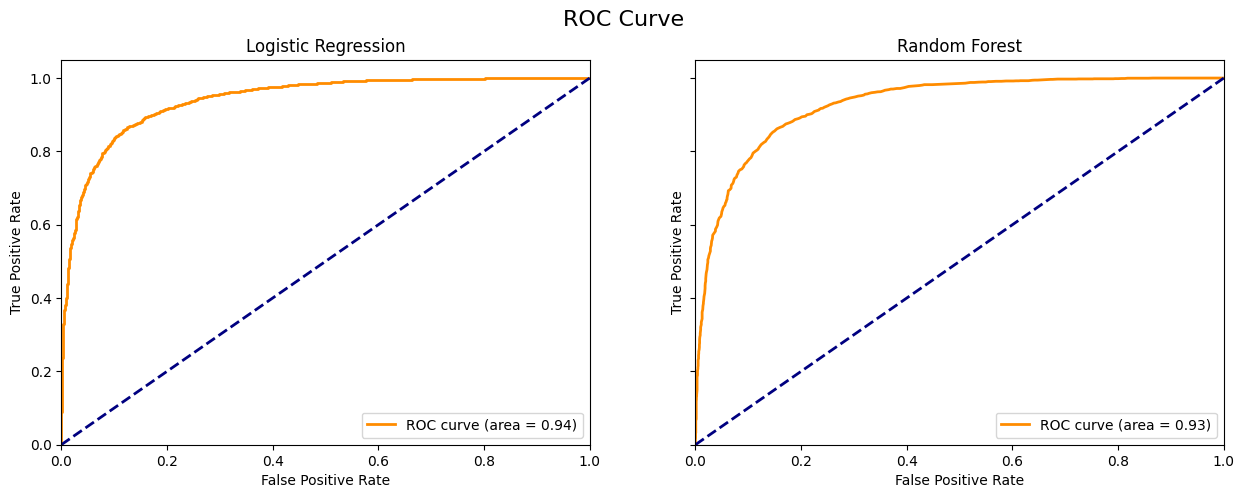

In [90]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ =  roc_curve(y_test, predict_proba_10[i])
    roc_auc[i] = roc_auc_score(y_test, predict_proba_10[i])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
fig.suptitle("ROC Curve", fontsize=16)
ax[0].plot(fpr[0], tpr[0], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[0])
ax[0].set_title("Logistic Regression")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].legend(loc="lower right")

ax[1].plot(fpr[1], tpr[1], color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[1])
ax[1].set_title("Random Forest")
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].legend(loc="lower right")

plt.show()


## Part 2. Word Embeddings [7 points]

In [91]:
import gensim.downloader

Here is the list of pretrained word embedding models. We suggest using `glove-wiki-gigaword-100`.

In [92]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [93]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

**Task 2.1 [1 point] - WordEmbeddings Geometry**

As you probably know, vector space of word embeddings has non-trivial geometry: some word relations (like country-capital or single-plural) cab be represented by vectors, like: **(king - man) + woman = queen**

<img src="https://linkme.ufanet.ru/images/5687a2011b49eb2413912f1c7d0fb0bd.png" width=600px>

Check this statement on words from the above picture with `word_embeddings.most_similar` function. Pay attention to `positive` and `negative` params.

Provide **several** examples, make sure to present different relations: some for nouns, some for verbs, etc.

In [104]:
word_embeddings.most_similar(positive=['woman', 'king'], negative=['man'], topn=2)

[('queen', 0.7698540687561035), ('monarch', 0.6843381524085999)]

In [105]:
word_embeddings.most_similar(positive=['england', 'rome'], negative=['london'], topn=2)

[('italy', 0.7002978324890137), ('roman', 0.631718099117279)]

In [120]:
word_embeddings.most_similar(positive=['looked', 'drink'], negative=['look'], topn=2)

[('drank', 0.8113983273506165), ('drinks', 0.7553770542144775)]

In [122]:
word_embeddings.most_similar(positive=['going', 'wear'], negative=['go'], topn=2)

[('wearing', 0.8005819916725159), ('wore', 0.778825044631958)]

In [123]:
word_embeddings.most_similar(positive=['does', 'come'], negative=['do'], topn=2)

[('comes', 0.8977324962615967), ('goes', 0.8343337774276733)]

In [135]:
word_embeddings.most_similar(positive=['himself', 'she'], negative=['he'], topn=2)

[('herself', 0.9654035568237305), ('her', 0.8058045506477356)]

But it is not so good every time

In [138]:
word_embeddings.most_similar(positive=['did', 'leave'], negative=['do'], topn=10)

[('returned', 0.8331507444381714),
 ('return', 0.8167383670806885),
 ('immediately', 0.7941232323646545),
 ('leaving', 0.7807642221450806),
 ('later', 0.7713992595672607),
 ('refused', 0.7688611149787903),
 ('soon', 0.7683849930763245),
 ('came', 0.7664516568183899),
 ('left', 0.763020396232605),
 ('took', 0.7575095295906067)]

We were waiting *left* but it`s only top-9

In [140]:
word_embeddings.most_similar(positive=['slower', 'slower'], negative=['slow'], topn=10)

[('faster', 0.7085668444633484),
 ('weaker', 0.5875832438468933),
 ('slowing', 0.5863884687423706),
 ('quicker', 0.5862624049186707),
 ('slowest', 0.5706308484077454),
 ('contraction', 0.5534616112709045),
 ('shorter', 0.5459062457084656),
 ('forecasts', 0.5329715013504028),
 ('noticeably', 0.5232601165771484),
 ('considerably', 0.5217990279197693)]

We were waiting *slowest* but it`s only top-5

**Task 2.2 [2 point] - POS analysis**

Use POS tagger to calculate most common POS in the dataset. 
Here you may read about nltk-taggers: [link](https://www.inf.ed.ac.uk/teaching/courses/icl/nltk/tagging.pdf)

- If you were to design POS-related weights, how would you do it? 
- What POS would get the higher weight? 

In [141]:
from nltk import pos_tag

In [143]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timo2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\timo2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [144]:
tokens_tag = []

for x in X_train:
    tok_tag = pos_tag(tk.tokenize(x.lower()))
    for t in tok_tag:
        tokens_tag.append(t[1])

In [145]:
c_tag = Counter(tokens_tag)
c_tag.most_common(10)

[('NN', 1036465),
 ('IN', 534008),
 ('DT', 524314),
 ('JJ', 476049),
 ('RB', 261886),
 ('VBZ', 195943),
 ('VB', 184937),
 ('CC', 177539),
 ('NNS', 172899),
 ('PRP', 153914)]

The most frequent are:  
- Noun;  
- Preposition;  
- Determiner;  
- Adjective;  
- Adverb;  
- Verb;

I think it's enough to use the proportion of each tag as weights. So, the largest weight will has noun

**Task 2.3 [4 points] - WordEmbeddings**

Use dense vector representations to construct vector-representation of each review, then train a model (LR or RF).

Compare results of the new model to results of the models above.

**Important**
- If you just sum embeddings of each token to get an embedding of the whole review, the cost of the task is **[2 points]**
- For **[4 points]** you have to use either TF-IDF weight or weights that you designed from POS tags.

Coming soon